In [3]:
#*****************************************#

    # Alexander Broders Problem Set 4 #

#*****************************************#

import numpy as np
import matplotlib.pyplot as plt 
ran = np.random.default_rng()

from scipy.signal import convolve
from matplotlib.animation import FuncAnimation

The code section below is taken from Kinder and Nelson page 120

The code is making an image of a square in the middle by using a filter by changing the value of the middle pixels using my_filter

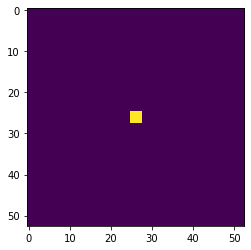

In [4]:
impulse = np.zeros( (51, 51) )
impulse[25,25] = 1.0
my_filter = np.ones( (3, 3) ) / 9
response = convolve(impulse, my_filter) 
plt.figure()
plt.imshow(response)

Next I downloaded an image of a cat and a gauss filter from press.princeton.edu 

In [5]:
bwCat = plt.imread('bwCat.tif')    # loads picture of cat into notebook
gauss_filter = np.loadtxt('gauss_filter.csv', delimiter = ',')  # loads gauss_filter.csv into notebook

Small sqaure is a filter that blurs neighbouring pixels together making the image a bit fuzzy. new_catim is the resulting image when a convolution to the original black and white cat image. The two different images are then displayed right next to each other. 

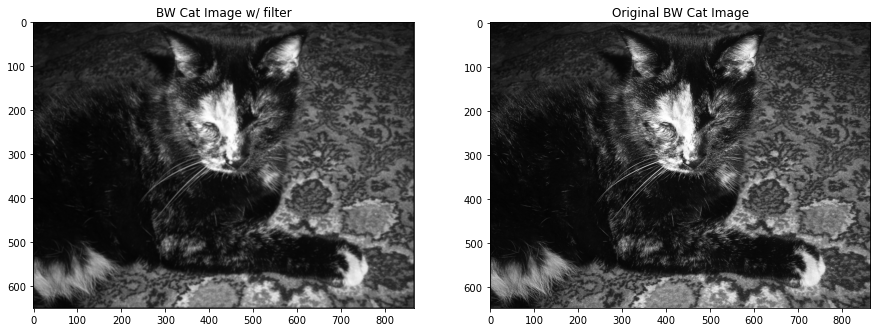

In [73]:
small_square = np.ones( (3, 3) ) / 9  # small square filter

new_catim = convolve(bwCat, my_filter)

plt.figure(figsize = (15, 15))

plt.subplot(1,2,1)
plt.set_cmap('gray')
plt.title('BW Cat Image w/ filter')
plt.imshow(new_catim)

plt.subplot(1,2,2)
plt.set_cmap('gray')
plt.title('Original BW Cat Image')
plt.imshow(bwCat)

The filter lessens the resolution of the original image. The new image is slightly more blurry than the original

The following section is doing the same as above expect with a different filter. large_square is the same as small_square except it blends together more neighbouring pixels as small_square making the resulting image after a convolution more blurry. The cat image with large_square filter and the original cat image are then displayed next to each other. 

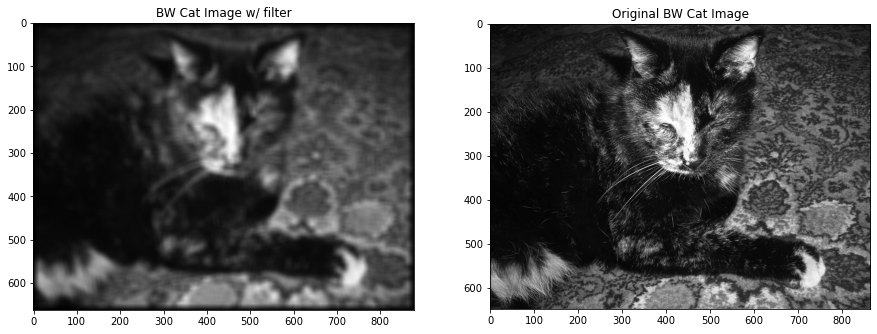

In [26]:
large_square = np.ones( (15, 15) ) / 9    # large square filter 
catim = convolve(bwCat, new_filter)

plt.figure(figsize = (15, 15))

plt.subplot(1,2,1)
plt.set_cmap('gray')
plt.title('BW Cat Image w/ filter')
plt.imshow(catim)

plt.subplot(1,2,2)
plt.set_cmap('gray')
plt.title('Original BW Cat Image')
plt.imshow(bwCat)

When the array size of the filter become larger it makes the effect of the filter more evident. As seen above with the 15 x 15 array, the image become much more blurry. It has the same affect as the 3 x 3 filter, but the effects are more exaggerated.

Next, the same cat image and a different filter, gauss_filter, which was downloaded off press.princeton.edu was then used as above. The resulting image and the original again are displayed side by side. 

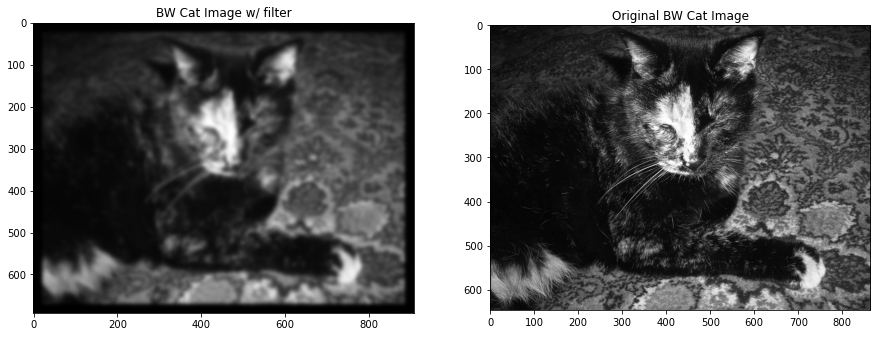

In [8]:
gauss = np.array(gauss_filter)

gauss_convIm = convolve(bwCat, gauss)

plt.figure(figsize =(15, 15))

plt.subplot(1,2,1)
plt.set_cmap('gray')
plt.title('BW Cat Image w/ filter')
plt.imshow(gauss_convIm)

plt.subplot(1,2,2)
plt.set_cmap('gray')
plt.title('Original BW Cat Image')
plt.imshow(bwCat)

The effects of the gauss_filter are shown above. It seems to 'soften' the image a bit. It has a very similar effect to the square filters

To try and find the difference in effects of the gauss_filter and a square filter, they were then both tested on the image of the dot to see if there is anything noticable. 

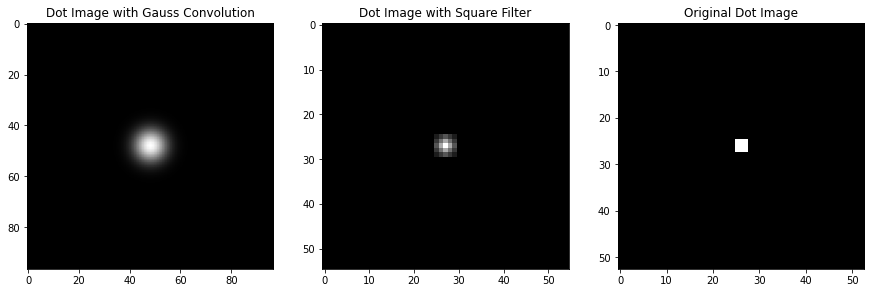

In [74]:
gauss_dot = convolve(response, gauss)
plt.figure(figsize = (15, 15))

plt.subplot(1,3,1)
plt.set_cmap('gray')
plt.title('Dot Image with Gauss Convolution')
plt.imshow(gauss_dot)

plt.subplot(1,3,2)
plt.set_cmap('gray')
plt.title('Dot Image with Square Filter')
plt.imshow(convolve(response, my_filter))

plt.subplot(1,3,3)
plt.set_cmap('gray')
plt.title('Original Dot Image')
plt.imshow(response)

As seen from the images above, the gauss filter seems to have a much rounder effect. It merges all neighbouring pixels, even on diagonals, whereas the square filter does not seem to do that. The gauss filter also seems to be a lot more precise in the sense that it makes the image appear less pixelated. 

To inspect the Gauss filter further, it will be plotted on 3D axis to see what it looks like. I made the size of the x and y coordinates the same size as the gauss filter array, making 97 different points. Then used meshgrid to make them plottable on 3D axis. The z value is the gauss_filter so there should only be change in the z axis 

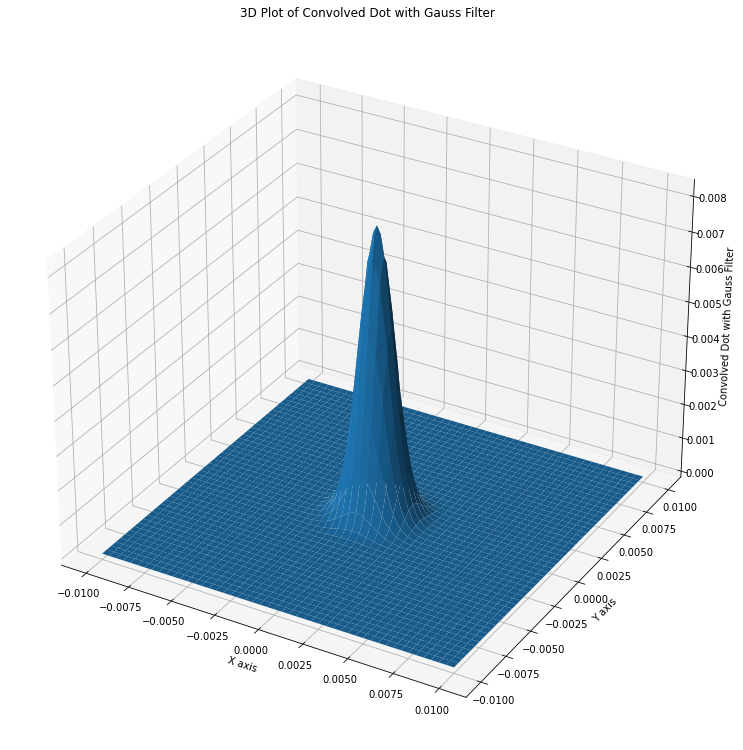

In [10]:
from mpl_toolkits.mplot3d import Axes3D

x = y = np.linspace(-0.01, 0.01, 97)
X, Y = np.meshgrid(x, y)

ax = Axes3D( plt.figure(figsize = (10, 10)) )
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Convolved Dot with Gauss Filter')
ax.set_title('3D Plot of Convolved Dot with Gauss Filter')
ax.plot_surface(X, Y, gauss_dot)

The gauss filter 

The next task is to multiply each pixel by a random number. I was going to do this simply using convolve like above, however that would multiply each pixel by the same random number which would not give the effects that I want. I wrote a function ranIm() to do this instead. There is a double for loop, as the image is arrays within an array. The first for loop selects each array individually, the the nested for loop then goes through each pixel and multiplys it by a random number between 0 and 1 individually. I then append these values to an array, and append that array which is what is returned. I had to adjust the iopub data rate limit in order to run this function. I did that in my terminal and changed it to 1e9 bytes/sec instead of the original 1e7 bytes/sec

In [21]:
def ranIm(): 
    noisyCat = []
    for arr in range(len(bwCat)): 
        newArr = []
        for pix in range(len(bwCat[arr])):
            newArr.append(bwCat[arr][pix] * ran.random())
        noisyCat.append(newArr)
    return noisyCat        

The noisy image, where each pixel is multiplied by a random number is displayed below 

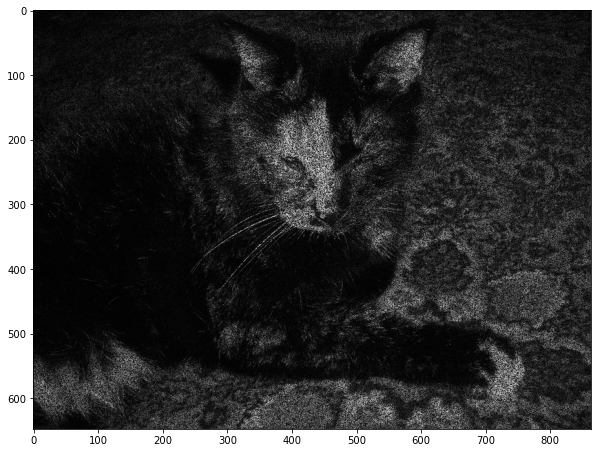

In [75]:
plt.figure( figsize= (10, 10) )
plt.imshow(ranIm())

The three filters (small_square, large_sqaure and gauss_filter) used above are then used on the noisy image to see which one cleans up the noisy the most. 

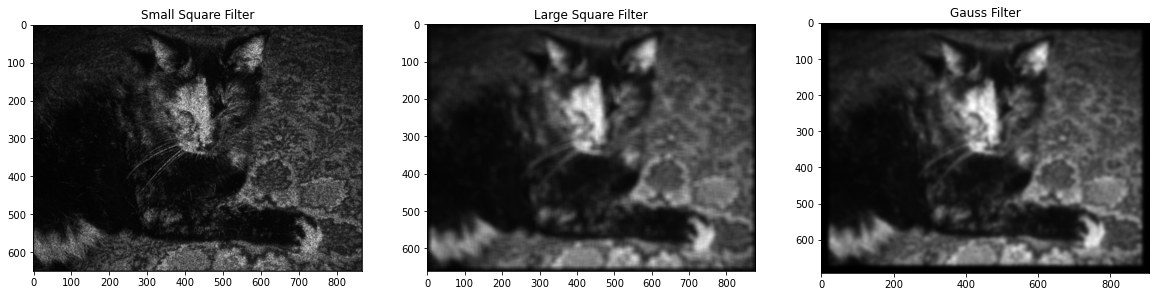

In [28]:
plt.figure( figsize=(20,20) )

plt.subplot(1,3,1)
plt.title('Small Square Filter')
plt.imshow(convolve(ranIm(), small_square))

plt.subplot(1,3,2)
plt.title('Large Square Filter')
plt.imshow(convolve(ranIm(), large_square))

plt.subplot(1,3,3)
plt.title('Gauss Filter')
plt.imshow(convolve(ranIm(), gauss))

The effects on the image are similar to that of the regular cat image. The small square image seems the most pixelated, the large square image seems to be the blurriest, and the gauss filter is still blurry but appears to clean up the noise the most and make it appear as an unfocused photo. 

The three images are shown again, expect they are made larger just to see the effects more clearly 

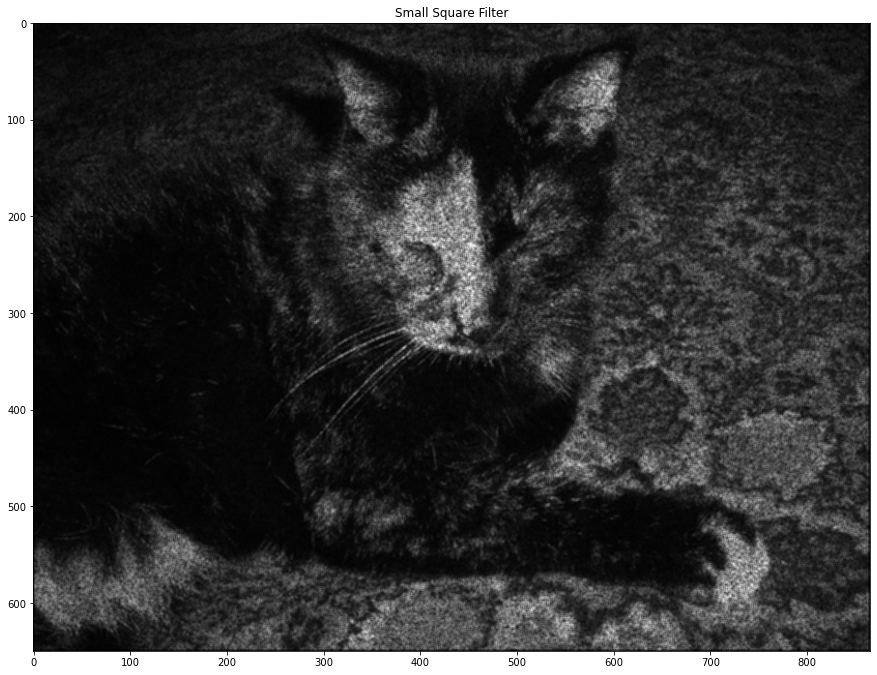

In [29]:
plt.figure( figsize = (15,15) )
plt.title('Small Square Filter')
plt.imshow(convolve(ranIm(), small_square))

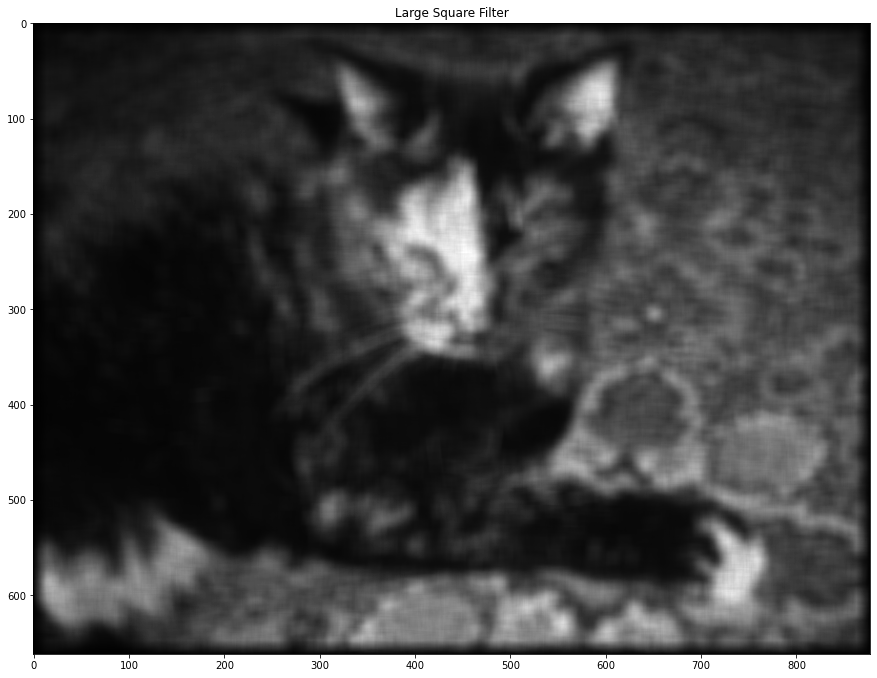

In [30]:
plt.figure( figsize = (15,15) )
plt.title('Large Square Filter')
plt.imshow(convolve(ranIm(), large_square))

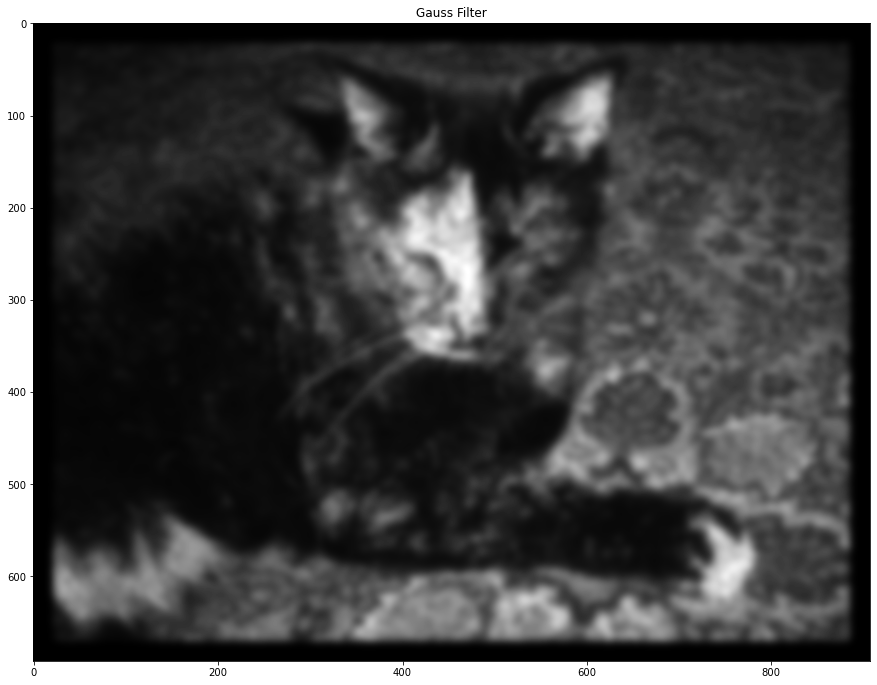

In [31]:
plt.figure( figsize = (15,15) )
plt.title('Gauss Filter')
plt.imshow(convolve(ranIm(), gauss))

Even when the images are blown up much large, they appear to prove what I said originally

I then downloaded the stressFibers.csv off press.princeton.edu and the image is shown below 

(444, 376)


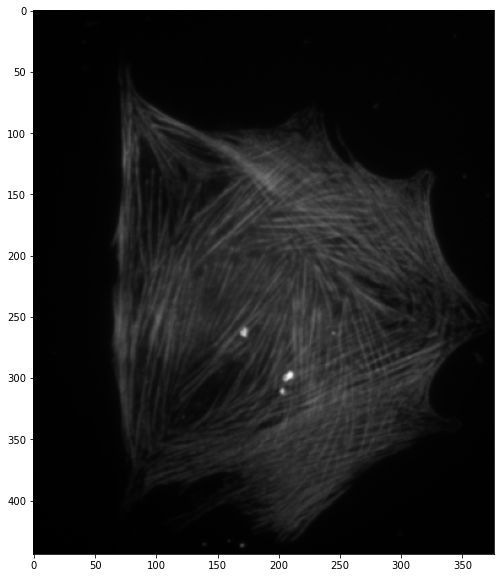

In [41]:
stressFibers = np.loadtxt('stressFibers.csv', delimiter = ',')

print(stressFibers.shape)
plt.figure(figsize=(10,10))
plt.imshow(stressFibers)

The following block of code was taken from Kinder and Nelson page 123

In [42]:
v = np.arange(-25, 26)              
X, Y = np.meshgrid(v, v)
gauss_filter = np.exp(-0.5*(X**2/2 + Y**2/45))

The new gauss_filter is then plotted below on 3D axis

Text(0.5, 0, 'Gauss_filter')

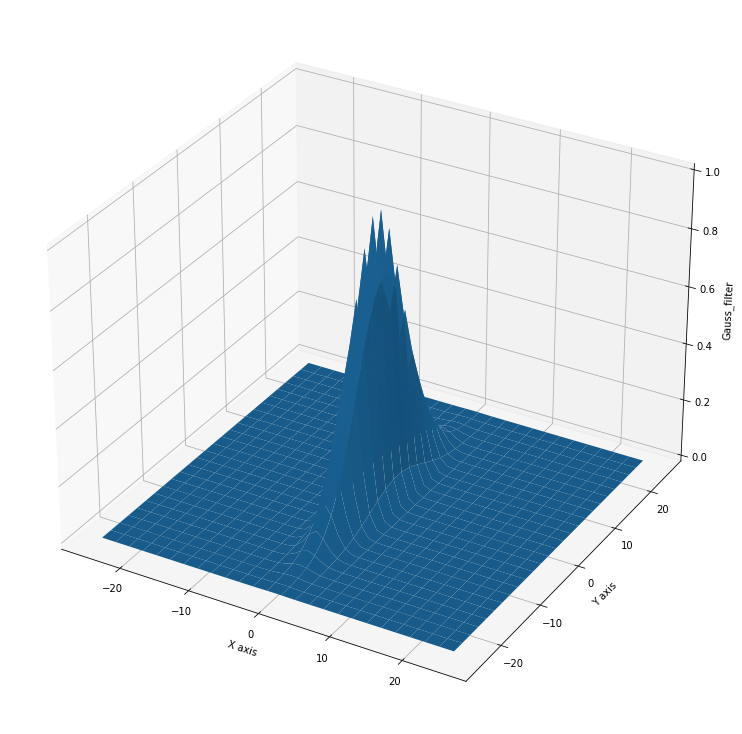

In [76]:
ax = Axes3D( plt.figure(figsize = (10, 10)) )
ax.plot_surface(X, Y, gauss_filter)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Gauss_filter')

The filter above seems be porabola like in the z-axis, and not much change in the y plane. There are spikes at the top of the parabola

The following block of code was taken from Kinder and Nelson page 123. It is a convolution of the above gauss_filter laplacian filter. 

In [48]:
laplace_filter = np.array( [ [0, -1, 0], [-1, 4, -1], [0, -1, 0] ] )
combined_filter = convolve(gauss_filter, laplace_filter, mode='valid')

The combined_filter above is then plotted on 3D axis to see what effects it could have and how its different from the originol gauss_filter

(49, 49)
(51, 51)


Text(0.5, 0, 'Combined Filter')

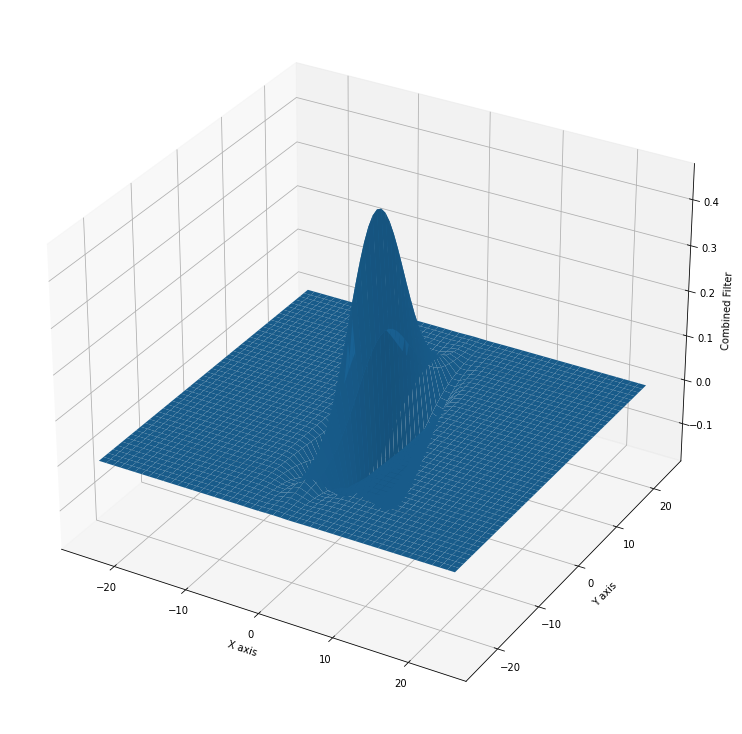

In [77]:
print(combined_filter.shape)
print(gauss_filter.shape)

v = np.arange(-24, 25)     # had to change these values to make the dimesions line up         
X, Y = np.meshgrid(v, v)

ax = Axes3D( plt.figure(figsize = (10, 10)) )
ax.plot_surface(X, Y, combined_filter)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Combined Filter')

The combined filter looks to have the same parabola shape as the original gauss_filter, however with the convolution the spikes have been removed. This is from the laplacian filter and how it makes sharp edges like that less extreme. There also appears to be a negative parabola below the positive one as well. There is a lot going on the in the z-plane (vertical) but not much elsewhere. 

The convolution of the combined filter and the stress fibers photo is then shown below 

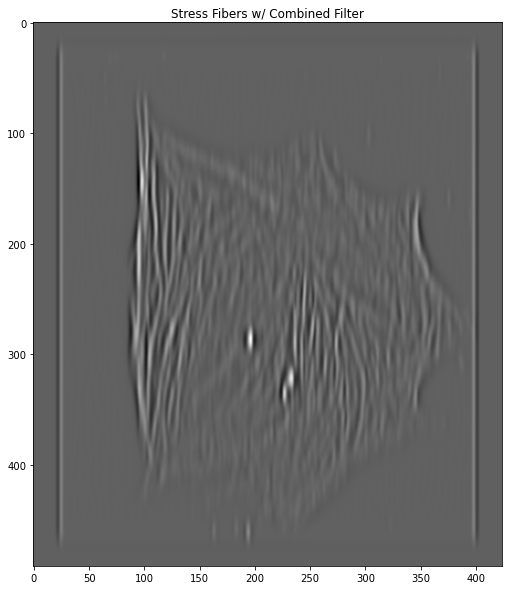

In [56]:
plt.figure( figsize = (10,10) )
plt.title('Stress Fibers w/ Combined Filter')
plt.imshow(convolve(stressFibers, combined_filter))

The colors are not the best in this, and below is the optimization of the photo to see it better.

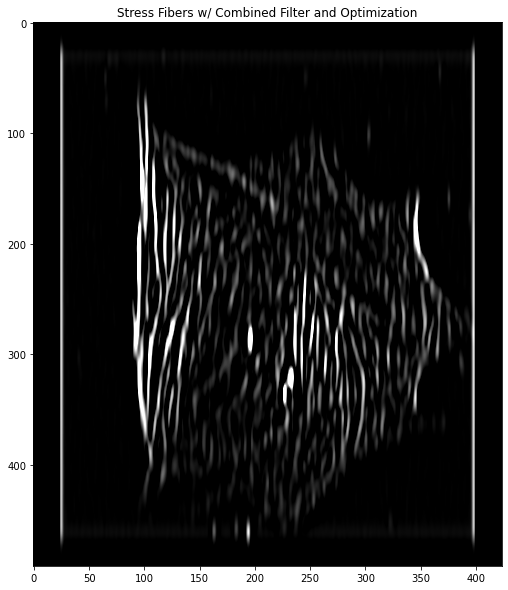

In [69]:
plt.figure(figsize=(10,10))
plt.title('Stress Fibers w/ Combined Filter and Optimization')
plt.imshow(convolve(stressFibers, combined_filter), vmin=0, vmax=0.5*stressFibers.max())  
# Line above taken from Kinder and Nelson page 123

As you can see, this filter does emphasize everything in the vertical plane. With the color optimization you can see this much better. 

Now in order to get a filter that emphasizes the stress fibers in the horizontal plane, I changed the place of Z and X from above to rotate the filter. That is shown below.

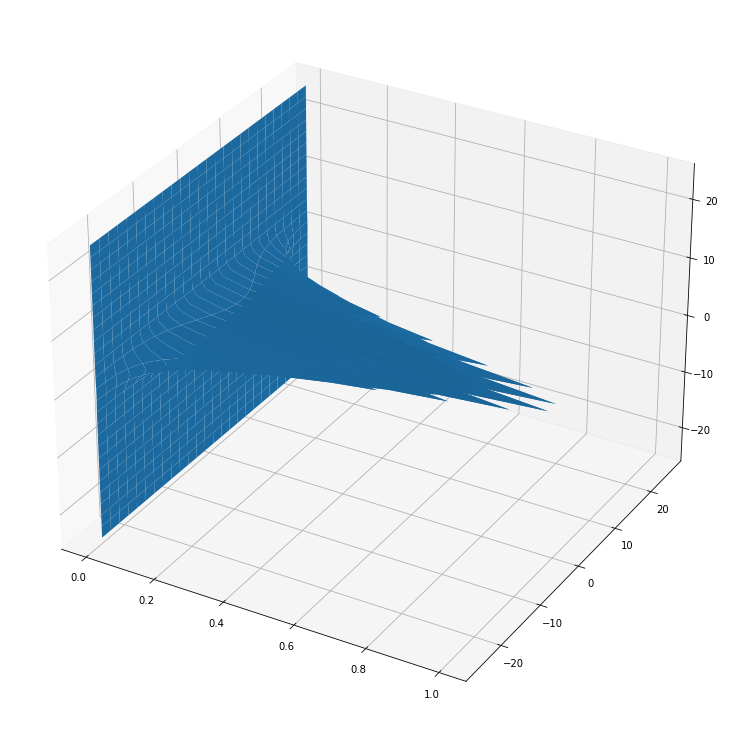

In [79]:
horizontal_filter = np.exp(-0.5*(Z**2/45 + Y**2/2))
v = np.arange(-25, 26)              
Z, Y = np.meshgrid(v, v)

ax = Axes3D( plt.figure(figsize = (10, 10)) )
ax.plot_surface(gauss_filter, Y, Z)

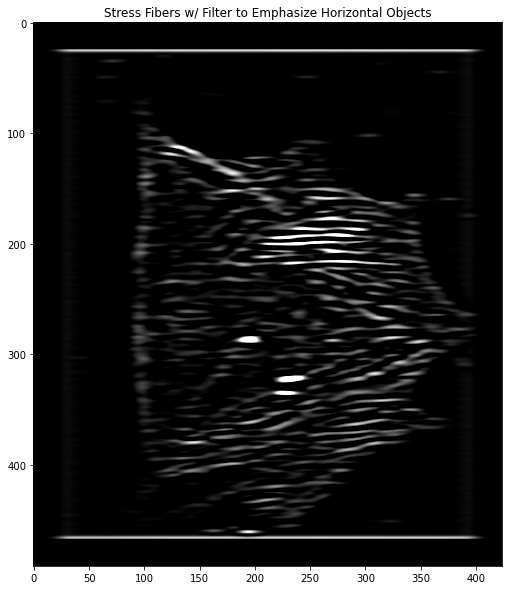

In [81]:
horizontal_combined_filter = convolve(horizontal_filter, laplace_filter, mode='valid')

plt.figure( figsize=(10,10) )
plt.title('Stress Fibers w/ Filter to Emphasize Horizontal Objects')
plt.imshow(convolve(stressFibers, horizontal_combined_filter), vmin=0, vmax=0.5*stressFibers.max())

As you can see, this rotation has worked, and after the same color optimization, the stress fibers in the horizontal plane are much more visible and emphasized. 